In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "DejaVu Sans"

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.svm import SVR


In [2]:
df = pd.read_pickle('df_growth.pkl')

In [3]:
mass_cols = ['cellMass', 'growth', 'dnaMass', 'tRnaMass', 'extracellular_mass',
       'proteinMass', 'projection_mass', 'pilus_mass', 'mRnaMass',
       'smallMoleculeMass', 'instantaniousGrowthRate', 'membrane_mass']

In [4]:
df.head()

,cellMass,growth,dryMass,waterMass,dnaMass,cytosol_mass,tRnaMass,extracellular_mass,rRnaMass,proteinMass,...,smallMoleculeMass,instantaniousGrowthRate,membrane_mass,periplasm_mass,cell_path,variant,generation,gene_id,seed,average_growth
42,1319.633768,0.164194,396.173003,923.460765,6.665629,1252.747287,8.331276,8.179068,46.396716,183.994445,...,148.199438,0.000207,0.059241,18.453566,/media/ig13470/Elements/BC4_data/out/20220309/...,20220309.172505__KOName_metF_KDRNA_EG10585_RNA_,generation_000000,metF,000000,0.0
45,1316.327575578354,nan,394.89823670627493,921.4293388720791,6.641896101736966,1249.4641496807617,8.309727934268675,8.197342283264728,46.33028646991306,182.94771137121015,...,148.12064903391425,nan,0.05477458018267908,18.409627466685123,/media/ig13470/Elements/BC4_data/out/20220309/...,20220309.174225__KOName_rplM_KDRNA_EG10874_RNA_,generation_000000,rplM,000000,0.0
46,1317.0531841258003,nan,395.11592420101726,921.937259924783,6.641896101736966,1250.2153991913958,8.296689251436561,8.1737444406331,46.41995788306515,182.9692622104934,...,148.20220680622882,nan,0.056412363157715355,18.415324784734857,/media/ig13470/Elements/BC4_data/out/20220309/...,20220309.174349__KOName_rpmB_KDRNA_EG10886_RNA_,generation_000000,rpmB,000000,0.0
47,1319.017129097968,nan,395.70510731358354,923.3120217843846,6.641896101736966,1252.0099232428795,8.289411824334374,8.2011661384431,46.814920190716364,182.9594071744863,...,148.42315598565483,nan,0.05723129185210211,18.45578924682757,/media/ig13470/Elements/BC4_data/out/20220309/...,20220309.174520__KOName_rpsD_KDRNA_EG10903_RNA_,generation_000000,rpsD,000000,0.0
102,1367.598503,0.119225,410.559937,957.038566,7.274833,1296.376535,9.115233,8.856535,50.459178,198.414294,...,142.33724,0.000145,0.06196,18.855482,/media/ig13470/Elements/BC4_data/out/20220309/...,20220309.171109__KOName_glnA_KDRNA_EG10383_RNA_,generation_000000,glnA,000000,0.0


In [5]:
train_genes = ['pntA', 'rpmB', 'aroG', 'pyrF', 'pyrC', 'yjeH', 'dxs', 'nanK', 'lacY', 'tppB', 'dhaL', 'gabT', 'emrE', 'sgbU', 'glxK', 'gcvP', 
               'pyrG', 'bioF', 'argA', 'purB', 'rplT', 'ileS', 'ppa', 'glcE', 'glyS', 'cdh', 'rpmH', 'rpiA', 'hisG', 'pyrB', 'csdA', 'ybbO', 
               'kdsC', 'leuC', 'frdA', 'rpsB', 'epmB', 'sucD', 'prpD', 'orn', 'entD', 'aceE', 'argT', 'atpE', 'nanA', 'frlB', 'mpaA', 'rpoC', 
               'folE', 'potG', 'rpsA', 'metB', 'iscS', 'waaB', 'guaA', 'rplK', 'hisF', 'rcnA', 'argC', 'rpsK', 'thiL', 'ribB', 'menE', 'rpsO', 
               'sucB', 'nhaA', 'pykA', 'araE', 'rplX', 'rpsJ', 'dfp', 'argS', 'aroE', 'araB', 'yliI', 'rpsU', 'cysK', 'fkpA', 'atpH', 'tyrP', 
               'cpsG', 'ybgT', 'ispU', 'aroF', 'fumA', 'paaC', 'cysM', 'atpB', 'livJ', 'argB', 'ompF', 'fadE', 'rdgB', 'aroH', 'argR', 'hisS', 
               'malP', 'purU', 'rhaD', 'rplI', 'visC', 'purH', 'dcuR', 'msbA', 'thrC', 'rplP', 'fabG', 'cysI', 'pyrH', 'gltA', 'rpsH', 'yeiG', 
               'nudF', 'alr', 'cysC', 'paaA', 'ulaF', 'accA', 'rpsN', 'cysN', 'tyrB', 'nadR', 'cheR', 'dcuB', 'argD', 'cysG', 'glmU', 'nikA', 
               'argI', 'carB', 'truC', 'yjhH', 'talB', 'azoR', 'hisB', 'appB', 'leuD', 'kdsD', 'purF', 'rpmI', 'astA', 'sbmA', 'rpsS', 'bioB', 
               'arcA', 'cpdA', 'glnH', 'rnb', 'ugpQ', 'yfaU', 'xdhB', 'tnaA', 'uacT', 'etp', 'gltL', 'rpsI', 'potI', 'aspA', 'glyA', 'araC', 
               'dapB', 'leuB', 'purK', 'trpC', 'puuP', 'gmhB', 'serS', 'glk', 'hisC', 'rihB', 'dapE', 'rplD', 'rpsG', 'cadB', 'idnO', 'lsrA', 
               'rpsD', 'ispD', 'bglJ', 'rpsC', 'maeB', 'nirC', 'ybjI', 'aroK', 'glyQ', 'slyD', 'cysJ', 'dapA', 'ttdB', 'ispB', 'asd', 'ilvE', 
               'rpmF', 'asnS', 'hisD', 'yddG', 'prmC', 'ndk', 'xylB', 'gltK', 'alaE', 'ybcF', 'pheA', 'ackA', 'cdsA', 'ppsA', 'scpB', 'pstA', 
               'purL', 'pfkB', 'ydbK', 'dgoA', 'ilvD', 'serC', 'alaS', 'gltX', 'dkgA', 'prs', 'trpA', 'cyoE', 'araG', 'gpmA', 'trpD', 'fmt', 
               'yfbR', 'proS', 'lptG', 'aceA', 'oppB', 'asnA', 'cdd', 'purA', 'rplR', 'coaE', 'rfaD', 'cytR', 'hisH', 'cysQ', 'rplL', 'nadC', 
               'cysP', 'amn', 'birA', 'thrS', 'nuoG', 'bisC', 'yihX', 'yrfG', 'aspS', 'cysS', 'rplF', 'rpsE', 'ulaD', 'aroC', 'deoC', 'lldD', 
               'ddlB', 'proW', 'lptA', 'garL', 'rpsF', 'potH', 'tilS', 'guaB', 'aat', 'gmk', 'appA', 'cysD', 'betA', 'rplY', 'leuS', 'xanQ', 
               'bglF', 'aroA', 'argE', 'apaH', 'aphA', 'pgl', 'adhP', 'manA', 'fes', 'apt', 'gntP', 'ytfG', 'ulaE', 'purE', 'yhbO', 'dppD', 
               'rpsT', 'metA', 'thyA', 'trxB', 'tolB', 'folB', 'aroL', 'murJ', 'cysH', 'rpmC', 'atpC', 'rplN', 'hisM', 'dxr', 'argG', 'ansA', 
               'nupC', 'rpsR', 'bioD', 'atpD', 'trpR', 'rpoA', 'rutG', 'lplA', 'yciA', 'miaB', 'alsE', 'waaA', 'bioA', 'xylA', 'mltC', 'araA', 
               'pheS', 'bioC', 'thrB', 'lpxH', 'crp', 'ansB', 'trpE', 'frlD', 'rplU', 'tyrA', 'gsk', 'dapD', 'atpA', 'cysU', 'eutB', 'rplB', 
               'rpoB', 'rpe', 'carA', 'ybaS', 'rplE', 'aceB', 'rhaA', 'fumC', 'cadA', 'zwf', 'mgsA', 'hisA', 'nuoH', 'pyrE', 'corA', 'rplQ', 
               'glnA', 'adk', 'dppB', 'purM', 'rpmA', 'rpmJ', 'speG', 'lpxL', 'folP', 'can', 'gadB', 'nhoA', 'rihC', 'rplV', 'atpG', 'cysE', 
               'luxS']

test_genes = ['ade', 'maa', 'fdnG', 'pdxY', 'rpsP', 'fklB', 'bioH', 'cysW', 'metG', 'araD', 'idnD', 'avtA', 'yiaY', 'nagD', 'rplS', 'cycA', 
              'rplC', 'yigL', 'rpsQ', 'metN', 'pgm', 'nanE', 'lptF', 'rpmE', 'glcA', 'rplM', 'tyrS', 'livG', 'aroD', 'rplO', 'astB', 'rplJ', 
              'aspC', 'rpsM', 'fucK', 'valS', 'cydC', 'yejE', 'sthA', 'araH', 'panC', 'rpmG', 'leuA', 'deoB', 'ilvC', 'nikD', 'rplW', 'proC', 
              'panE', 'adhE', 'betT', 'tmk', 'pyrD', 'puuC', 'araF', 'dapF', 'treF', 'nrdB', 'uxuB', 'sra', 'rpmD', 'dhaK', 'cpsB', 'aroB', 
              'asnB', 'lptC', 'purD', 'metF', 'trpS', 'argH', 'aroP', 'cysA', 'add', 'aldA', 'pyrI', 'glnS', 'aceF', 'malZ', 'purC', 'paaB', 
              'cyoA', 'rpsL', 'gatY', 'rplA', 'mak', 'potB', 'ycaO', 'betB', 'pheT', 'lysA', 'atpF', 'hisI', 'ygaH'
]

In [6]:
df = df.drop_duplicates(subset=["seed","gene_id"], keep="last")[df['seed'].isin(['000000', '000001'])]


In [7]:
X_train = df[(df['gene_id'].isin(train_genes))][mass_cols]
y_train = df[(df['gene_id'].isin(train_genes))]['average_growth']*3600

X_test = df[(df['gene_id'].isin(test_genes))][mass_cols]
y_test = df[(df['gene_id'].isin(test_genes))]['average_growth']*3600

In [8]:
print(len(X_train), len(X_test))

738 186


In [9]:
186/2

93.0

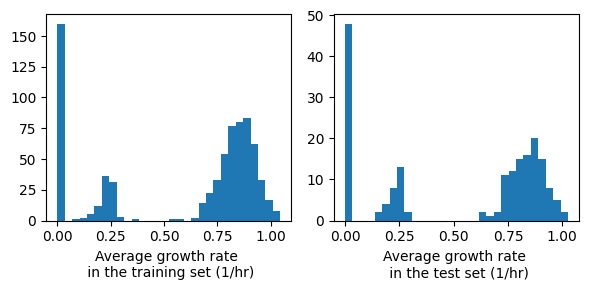

In [10]:
# Plot histogram
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3))

ax1.hist(y_train, bins=30)
ax2.hist(y_test, bins=30)

ax1.set(xlabel='Average growth rate \n in the training set (1/hr)')
ax2.set(xlabel='Average growth rate \n in the test set (1/hr)')
fig.tight_layout()
fig.savefig('y_distrib.pdf', dpi=500)
plt.show()



In [11]:
X_train

,cellMass,growth,dnaMass,tRnaMass,extracellular_mass,proteinMass,projection_mass,pilus_mass,mRnaMass,smallMoleculeMass,instantaniousGrowthRate,membrane_mass
46,1317.0531841258003,nan,6.641896101736966,8.296689251436561,8.1737444406331,182.9692622104934,0.05034602709452443,0.0001857864345236593,2.2834768167325254,148.20220680622882,nan,0.056412363157715355
47,1319.017129097968,nan,6.641896101736966,8.289411824334374,8.2011661384431,182.9594071744863,0.05327322012811935,0.00024703539476881973,2.266725789702396,148.42315598565483,nan,0.05723129185210211
102,1367.598503,0.119225,7.274833,9.115233,8.856535,198.414294,0.053843,0.000186,2.65647,142.33724,0.000145,0.06196
123,1334.123663,0.211685,6.748702,8.436038,8.274718,185.989968,0.052414,0.000215,2.348186,149.663698,0.000264,0.058482
124,1332.231593,0.204215,6.748702,8.436956,8.267342,185.926657,0.052734,0.000215,2.379195,149.476024,0.000255,0.059628
...,...,...,...,...,...,...,...,...,...,...,...,...
1344,2505.945986,0.371717,13.461784,16.751126,15.390914,347.416153,0.099985,0.000247,5.001998,278.106136,0.000247,0.092467
1346,2499.255959,0.369124,13.477607,16.464785,15.377036,346.905926,0.088263,0.000186,4.824948,277.651401,0.000246,0.163461
1349,2498.655656,0.364615,13.469695,16.625785,14.734124,345.60458,0.083513,0.000215,4.589298,277.844487,0.000243,0.095377
1350,2505.599377,0.366603,13.53299,16.734423,14.882129,346.730203,0.115261,0.00031,4.509481,278.263397,0.000244,0.108602


In [12]:
# Replace strings with float
import re
X_train = X_train.applymap(lambda x: re.sub(r'[^0-9.-]', '', str(x)) if isinstance(x, str) else x)
X_train = X_train.apply(pd.to_numeric, errors='coerce')

y_train = y_train.apply(lambda x: re.sub(r'[^0-9.-]', '', str(x)) if isinstance(x, str) else x)
y_train = pd.to_numeric(y_train, errors='coerce')

X_test = X_test.applymap(lambda x: re.sub(r'[^0-9.-]', '', str(x)) if isinstance(x, str) else x)
X_test = X_test.apply(pd.to_numeric, errors='coerce')

y_test = y_test.apply(lambda x: re.sub(r'[^0-9.-]', '', str(x)) if isinstance(x, str) else x)
y_test = pd.to_numeric(y_test, errors='coerce')

In [13]:
# Replace nan with zero because that means there was no growth
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

y_train.fillna(0, inplace=True)
y_test.fillna(0, inplace=True)

In [14]:
#Standardise the data
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)  

In [15]:
def evaluate_model(y_true, y_pred, dataset_name):
    """This method is used to compute different performance metrics for 
    different regression algorithms"""
    
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f" {dataset_name} Set Performance:")
    print(f"   MSE: {mse:.10f}")
    print(f"   RMSE: {rmse:.10f}")
    print(f"   MAE: {mae:.10f}")
    print(f"   R² Score: {r2:.4f}")
    print("--------------------------------------------------")

def r2_gap_and_maximize_test_r2(estimator, X_train, X_test, y_train, y_test):
    """
    This method creates a score that has to be maximised that combines the R2 test and minimise
    the gap between the test and train R2 to reduce overfitting
    """
    y_train_pred = estimator.predict(X_train)
    y_test_pred = estimator.predict(X_test)

    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    r2_gap = abs(r2_train - r2_test)

    return r2_test - r2_gap  # Higher is better (scikit-learn maximizes scores)

class CustomR2Scorer:
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test

    def scorer(self, estimator, X, y):
        return r2_gap_and_maximize_test_r2(estimator, self.X_train, self.X_test, self.y_train, self.y_test)

# Initialize custom scorer with train & test data
custom_scorer = CustomR2Scorer(X_train, X_test, y_train, y_test).scorer

In [16]:
# Different parameters to be tried for different regression algorithms

param_grids = {
   "Random Forest": {
    'n_estimators': [5, 10, 20, 30, 100], 
    'max_depth': [2, 3, 5, 10, 15, 20],  
    'min_samples_split': [2, 5, 10, 15, 20, 30, 40, 60],  
    'min_samples_leaf': [2, 5, 10, 15, 20],  
    'max_features': ['sqrt', 'log2'],  
    'bootstrap': [True, False]  
},

    "XGBoost": {
        'n_estimators': [ 50, 100, 300, 500],
        'learning_rate': [0.01, 0.02, 0.05],
        'max_depth': [2, 3, 5, 10, 15, 20],
        'colsample_bytree': [0.7, 1.0],
        'subsample': [0.8, 1.0],
        'reg_alpha': [0.1],  # L1 Regularization
        'reg_lambda': [0.5]  # L2 Regularization

    },
    
    "Linear Regression": {}  
    }

In [17]:
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "Linear Regression": LinearRegression()
}

tuned_models = {}

for name, model in models.items():
    # Skip tuning for Linear Regression
    if name == "Linear Regression":
        tuned_models[name] = model.fit(X_train, y_train)
        continue

    # Find the combination of parameters that optimise the function we defined, minimizing the
    # difference between the test and train R2 and maximising the test R2
    search = RandomizedSearchCV(
        model,
        param_distributions=param_grids[name],
        n_iter=100,  # Number of random trials
        scoring=custom_scorer,
        cv=5,  # 5-fold cross-validation
        random_state=42,
        n_jobs=-1
    )
    
    search.fit(X_train, y_train)
    tuned_models[name] = search.best_estimator_

    print(f"Best Parameters for {name}: {search.best_params_}")


Best Parameters for Random Forest: {'n_estimators': 5, 'min_samples_split': 40, 'min_samples_leaf': 20, 'max_features': 'sqrt', 'max_depth': 3, 'bootstrap': False}
Best Parameters for XGBoost: {'subsample': 1.0, 'reg_lambda': 0.5, 'reg_alpha': 0.1, 'n_estimators': 50, 'max_depth': 2, 'learning_rate': 0.05, 'colsample_bytree': 0.7}


In [19]:
results = {}

for name, model in tuned_models.items():

    # Predict
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Compute metrics
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Store results
    results[name] = {
        "MSE Train": mse_train,
        "MSE Test": mse_test,
        "MAE train": mae_train,
        "MAE Test": mae_test,
        "R² Train": r2_train,
        "R² Test": r2_test
    }

    # Print Results
    print(f" {name} Performance:")
    print(f"   MSE (Train): {mse_train:.5f}")
    print(f"   MSE (Test): {mse_test:.5f}")
    print(f"   MAE (Train): {mae_train:.5f}")
    print(f"   MAE (Test): {mae_test:.5f}")
    print(f"   R² (Train): {r2_train:.4f}")
    print(f"   R² (Test): {r2_test:.4f}")
    print("-" * 60)

 Random Forest Performance:
   MSE (Train): 0.01027
   MSE (Test): 0.01584
   MAE (Train): 0.05931
   MAE (Test): 0.06056
   R² (Train): 0.9269
   R² (Test): 0.8922
------------------------------------------------------------
 XGBoost Performance:
   MSE (Train): 0.01021
   MSE (Test): 0.01618
   MAE (Train): 0.06842
   MAE (Test): 0.07112
   R² (Train): 0.9273
   R² (Test): 0.8899
------------------------------------------------------------
 Linear Regression Performance:
   MSE (Train): 0.01245
   MSE (Test): 0.01785
   MAE (Train): 0.07120
   MAE (Test): 0.07323
   R² (Train): 0.9113
   R² (Test): 0.8784
------------------------------------------------------------
